# 파일다운로드
이미지, 파일, 파일이름

In [1]:
 # 웹에서 이미지와 같은 바이너리 형태 리소스 다운로드 받기
 # 
 #  <프로젝트에 download 폴더 만들고 진행하세요> 
 # 
 # 예제에 사용한 미디어 출처
 #  https://www.w3schools.com/html/html5_video.asp
 #  https://www.w3schools.com/html/html5_audio.asp
 #  https://www.w3schools.com/howto/howto_css_fullscreen_video.asp
 
 # 예제에 사용한 이미지 출처
 # 	https://www.w3schools.com/css/css_image_gallery.asp




# download 폴더 만들기

In [33]:
import os
dirName = 'download'
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print('Directory', dirName, "Created")
else:
    print('Directory', dirName, "already exists")

Directory download already exists


In [34]:
os.getcwd()

'D:\\ds2007'

## 다운로드 파일 URL 소스

In [35]:
# URL 에 파일명이 있는 형태
imgUrls = [
    "https://www.w3schools.com/css/img_5terre.jpg",
    "https://www.w3schools.com/css/img_forest.jpg", 
    "https://www.w3schools.com/css/img_lights.jpg",
    "https://www.w3schools.com/css/img_mountains.jpg"
]

movUrls = [
    "https://www.w3schools.com/html/movie.mp4",   # 영상
    "https://www.w3schools.com/howto/rain.mp4",
    "https://www.w3schools.com/html/mov_bbb.mp4",
    "https://www.w3schools.com/html/horse.ogg"    # 음성   
]

In [11]:
print(imgUrls[0])

https://www.w3schools.com/css/img_5terre.jpg


In [14]:
import requests
response = requests.get(imgUrls[0])
response

<Response [200]>

In [15]:
response.content # <---- 이진 파일 형태

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x00"Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x01\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lu

In [16]:
len(response.content) #파일 용량 (byte)

149372

In [17]:
with open(f"./{dirName}/test.jpg", 'wb') as f:
    f.write(response.content)

## URL에 있는 파일이름으로 다운로드 받기

In [20]:
import urllib.parse as urlparser
disassembled = urlparser.urlparse(imgUrls[0])
disassembled

ParseResult(scheme='https', netloc='www.w3schools.com', path='/css/img_5terre.jpg', params='', query='', fragment='')

In [23]:
disassembled.path

'/css/img_5terre.jpg'

In [24]:
from os.path import basename, splitext, split

In [27]:
filename = basename(disassembled.path)
filename

'img_5terre.jpg'

In [28]:
#  파일 명으로 저장하기
with open(f"./{dirName}/{filename}", "wb") as f:
    f.write(response.content)

In [36]:
import requests
import urllib.parse as urlparser # url에서 파일 명이 들어있는 path 받아오기
from os.path import basename # path에서 파일명 만 받아오기
from IPython.display import Image #python에서 이미지 펼치기

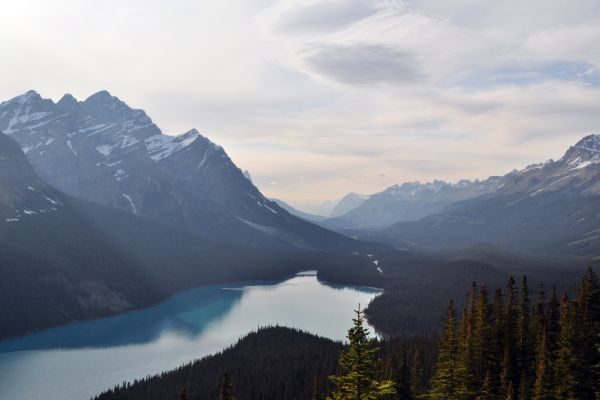

In [37]:
# jupyter notebook 에서 이미지 확인
from IPython.display import Image
Image(f'./{dirName}/{filename}')

In [38]:
for url in movUrls + imgUrls:
    disassembled = urlparser.urlparse(url)
    filename = basename(disassembled.path)
    print("다운로드", url, '->', filename)
    
    response = requests.get(url)
    if response.status_code == 200:
        with open(f"./{dirName}/{filename}", 'wb') as f:
            f.write(response.content)

다운로드 https://www.w3schools.com/html/movie.mp4 -> movie.mp4
다운로드 https://www.w3schools.com/howto/rain.mp4 -> rain.mp4
다운로드 https://www.w3schools.com/html/mov_bbb.mp4 -> mov_bbb.mp4
다운로드 https://www.w3schools.com/html/horse.ogg -> horse.ogg
다운로드 https://www.w3schools.com/css/img_5terre.jpg -> img_5terre.jpg
다운로드 https://www.w3schools.com/css/img_forest.jpg -> img_forest.jpg
다운로드 https://www.w3schools.com/css/img_lights.jpg -> img_lights.jpg
다운로드 https://www.w3schools.com/css/img_mountains.jpg -> img_mountains.jpg
